# **LLM - Detect AI Generated Text**
Identify which essay was written by a large language model

**EDA**

In [1]:
import pandas as pd
test_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
train_essays = pd.read_csv('/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv')
train_essays = train_essays.rename(columns={'label': 'generated', 'prompt_name': 'prompt_id'}, errors='ignore')
train_prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')


In [2]:
test_essays.head()

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [3]:
test_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [4]:
train_essays.head()

,text,generated,prompt_id,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [5]:
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   generated      44868 non-null  int64 
 2   prompt_id      44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [6]:
train_prompts.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [7]:
train_prompts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


In [8]:
train_prompts["prompt_name"]

0                     Car-free cities
1    Does the electoral college work?
Name: prompt_name, dtype: object

In [9]:
train_prompts["source_text"][0]

'# In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal\n\n1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.\n\n2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swiss borders. Vauban’s streets are completely “car-free”—except the main thoroughfare, where the tram to downtown Freiburg runs, and a few streets on one edge of the community. Car ownership is allowed, but there are only two places to park—large garages at the edge of the development, where a car-owner buys a space, for $40,000, along with a home.\n\n3 As a result, 70 percent of Vauban’s families do not own cars, and 57 percent sold a car to move here. “When I had a car I was always tense. I’m much happier this way,” said Heidrun Walter, a media trainer and mother of two, as she 

In [10]:
train_essays.query('generated == 0').iloc[0, 0]

"Phones\n\nModern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving. They are some really bad consequences when stuff happens when it comes to a phone. Some certain areas in the United States ban phones from class rooms just because of it.\n\nWhen people have phones, they know about certain apps that they have .Apps like Facebook Twitter Instagram and Snapchat. So like if a friend moves away and you want to be in contact you can still be in contact by posting videos or text messages. People always have different ways how to communicate with a phone. Phones have changed due to our generation.\n\nDriving is one of the way how to get around. People always be on their phones while doing it. Which can cause serious Problems. That's why there's a thing that's called no texting while driving. That's a really important thing to reme

In [11]:
train_essays.query("generated == 1").iloc[0, 0]

" In recent years, technology has had a profound impact on our daily lives and the world around us. From staying connected with loved ones to ordering food online through an app, technology has made our lives easier and more convenient. However, with great power comes great responsibility, and technology can also have negative consequences if used improperly.\n\nOne example of this is the spread of misinformation through the internet. It's easy to find articles and sources that may not be accurate or reliable, which can lead to confusion and even harm. Additionally, technology can also pose a threat to our privacy and security if we are not careful about the websites and apps we use.\n\nDespite these potential drawbacks, I believe that technology can be a powerful tool for achieving great things. For example, technology has revolutionized the way we learn and access information. With the internet, we can easily find resources and information on any topic, making it easier to stay infor

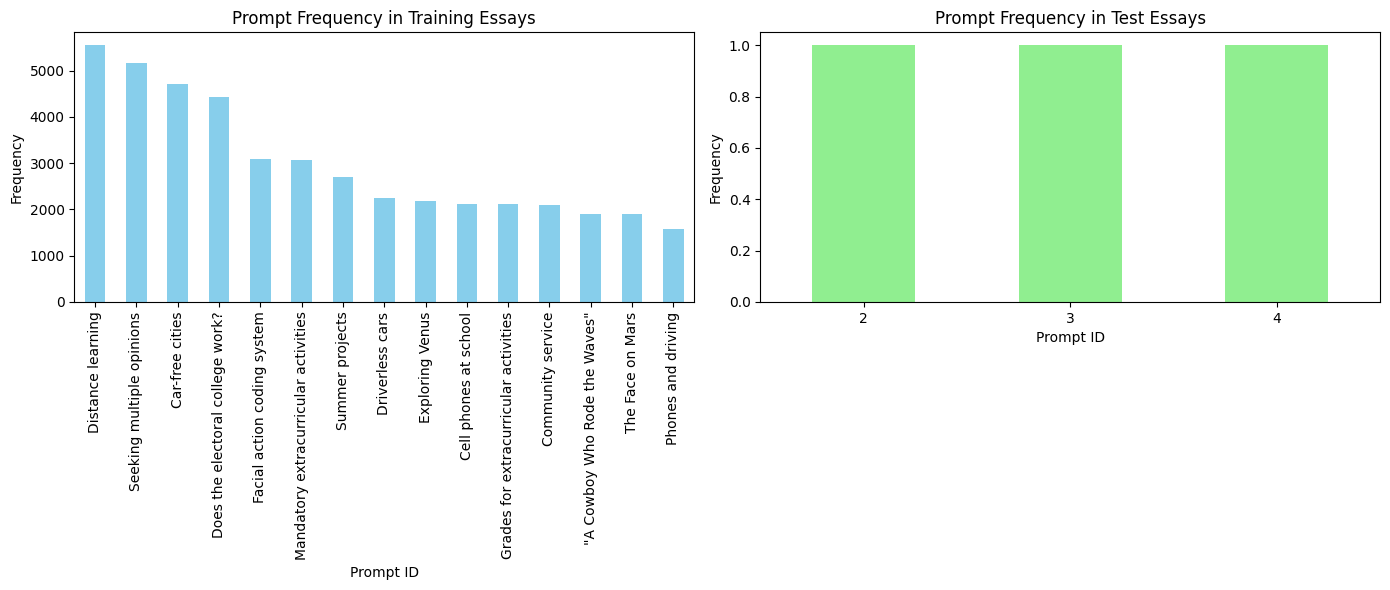

In [12]:
import matplotlib.pyplot as plt

# Count the frequency of each prompt in the train and test datasets
train_prompt_counts = train_essays['prompt_id'].value_counts()
test_prompt_counts = test_essays['prompt_id'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
train_prompt_counts.plot(kind='bar', color='skyblue')
plt.title('Prompt Frequency in Training Essays')
plt.xlabel('Prompt ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
test_prompt_counts.plot(kind='bar', color='lightgreen')
plt.title('Prompt Frequency in Test Essays')
plt.xlabel('Prompt ID')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [13]:
# train_essays.groupby('generated').mean()

In [14]:
train_essays[train_essays["generated"] == 1]

,text,generated,prompt_id,source,RDizzl3_seven
25996,"In recent years, technology has had a profoun...",1,Car-free cities,mistral7binstruct_v2,True
25997,I strongly believe that meditation and mindful...,1,Distance learning,llama_70b_v1,False
25998,One way school administrators can attempt to c...,1,Cell phones at school,chat_gpt_moth,False
25999,While summer is meant as a break from the regu...,1,Summer projects,darragh_claude_v7,False
26000,The use of Facial Action Coding System (FACS) ...,1,Facial action coding system,darragh_claude_v6,True
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


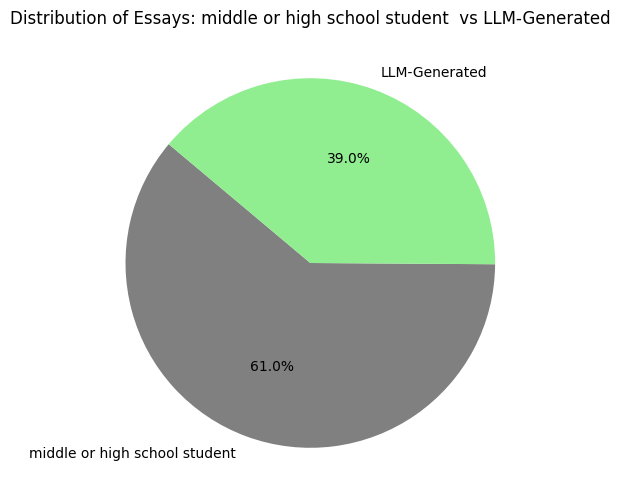

In [15]:
# Distribution of essays written by students vs LLM-generated
human_vs_ai_counts = train_essays['generated'].value_counts()
labels = ['middle or high school student ', 'LLM-Generated']
plt.figure(figsize=(8, 6))
plt.pie(human_vs_ai_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gray', 'lightgreen'])
plt.title('Distribution of Essays: middle or high school student  vs LLM-Generated')
plt.show()

The analysis showed that the middle or high school student essay was higher than that was LLM generated essay.

To resolve this need to combine the external dataset to solve the problem statement

**Building a Model using transformer (BERT)**

In [16]:
!pip install transformers


In [17]:
!pip install sentencepiece
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.2 MB/s eta 0:00:00


In [18]:
!pip install unidecode

In [19]:
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, confusion_matrix
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import torch


# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to preprocess and tokenize texts
def tokenize_texts(texts, max_length=512):
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        max_length=max_length,
        truncation=True,
        return_tensors="pt"
    )

# Tokenizing the combined texts
tokenized_data = tokenize_texts(train_essays['text'])

# Creating tensors for input IDs and attention masks
input_ids = tokenized_data['input_ids']
attention_masks = tokenized_data['attention_mask']

# Convert the labels to a tensor
# labels = torch.tensor(combined_labels.values)
labels = torch.tensor(train_essays['generated'])

In [21]:
# Splitting the dataset into training and validation sets
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_masks, labels, random_state=42, test_size=0.2
)
# train_masks, val_masks, _, _ = train_test_split(
#     attention_masks, labels, random_state=42, test_size=0.2
# )

# Creating Tensor datasets for training and validation
train_data = TensorDataset(train_inputs, train_masks, train_labels)
val_data = TensorDataset(val_inputs, val_masks, val_labels)

# Dataloaders
batch_size = 12
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Checking the size of training and validation sets
len(train_data), len(val_data)

(35894, 8974)

Text Cleaning and Tokenization using BERT

In [22]:
from transformers import BertForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [23]:
from torch.optim import AdamW

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {
        'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01
    },
    {
        'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0
    }
]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)

In [24]:
# model.save_pretrained('/path/to/save/model')

In [25]:
import gc

gc.collect()

7

In [26]:
# Training loop
epochs = 4
for _ in trange(epochs, desc="Epoch"):
    # Training
    model.train()
    total_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    for batch in train_dataloader:
        batch = [r.to(device) for r in batch]  # Send data to device
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}

        model.zero_grad()

        outputs = model(**inputs)
        loss = outputs[0].float()
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        nb_tr_examples += input_ids.size(0)
        nb_tr_steps += 1
        print("Step: {} | Train loss: {}".format(nb_tr_steps, total_loss / nb_tr_steps))

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss:.2f}")

    # Validation
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    for batch in val_dataloader:
        batch = [t.to(device) for t in batch]
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}

        with torch.no_grad():
            outputs = model(**inputs)
            loss = outputs[0].float()
            total_eval_loss += loss.item()

    avg_val_loss = total_eval_loss / len(val_dataloader)
    print(f"Validation Loss: {avg_val_loss:.2f}")

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Step: 1 | Train loss: 0.662236750125885
Step: 2 | Train loss: 0.6753298342227936
Step: 3 | Train loss: 0.6720284024874369
Step: 4 | Train loss: 0.6786248236894608
Step: 5 | Train loss: 0.6624703407287598
Step: 6 | Train loss: 0.6386982103188833
Step: 7 | Train loss: 0.6208400726318359
Step: 8 | Train loss: 0.6227522417902946
Step: 9 | Train loss: 0.6191672616534762
Step: 10 | Train loss: 0.6105269014835357
Step: 11 | Train loss: 0.5970557684248144
Step: 12 | Train loss: 0.5897948468724886
Step: 13 | Train loss: 0.5785308892910297
Step: 14 | Train loss: 0.5672083816358021
Step: 15 | Train loss: 0.5534977575143178
Step: 16 | Train loss: 0.5389117021113634
Step: 17 | Train loss: 0.5275992943960077
Step: 18 | Train loss: 0.5101621689067947
Step: 19 | Train loss: 0.49772552047905166
Step: 20 | Train loss: 0.4838691622018814
Step: 21 | Train loss: 0.4773535402048202
Step: 22 | Train loss: 0.46300022304058075
Step: 23 | Train loss: 0.4499683393084485
Step: 24 | Train loss: 0.43971422128379345

Epoch:  25%|██▌       | 1/4 [34:55<1:44:47, 2095.98s/it]

Validation Loss: 0.01
Step: 1 | Train loss: 0.0003481927851680666
Step: 2 | Train loss: 0.0003053514810744673
Step: 3 | Train loss: 0.00027467401620621484
Step: 4 | Train loss: 0.028263008905923925
Step: 5 | Train loss: 0.022656997723970562
Step: 6 | Train loss: 0.11293373230728321
Step: 7 | Train loss: 0.09690770821180195
Step: 8 | Train loss: 0.08483259477725369
Step: 9 | Train loss: 0.07553439905879916
Step: 10 | Train loss: 0.06808044625504409
Step: 11 | Train loss: 0.061947015365479856
Step: 12 | Train loss: 0.05702306172800794
Step: 13 | Train loss: 0.05284423004755249
Step: 14 | Train loss: 0.07005889204655043
Step: 15 | Train loss: 0.06938801528691935
Step: 16 | Train loss: 0.06513697837181098
Step: 17 | Train loss: 0.06137454726644244
Step: 18 | Train loss: 0.05817539418704756
Step: 19 | Train loss: 0.055147182072304485
Step: 20 | Train loss: 0.05263329918816453
Step: 21 | Train loss: 0.05017148197900193
Step: 22 | Train loss: 0.04794424770278221
Step: 23 | Train loss: 0.04617

Epoch:  50%|█████     | 2/4 [1:09:55<1:09:56, 2098.29s/it]

Validation Loss: 0.02
Step: 1 | Train loss: 0.0018449354683980346
Step: 2 | Train loss: 0.001644795062020421
Step: 3 | Train loss: 0.0013177197736998398
Step: 4 | Train loss: 0.0010259551017952617
Step: 5 | Train loss: 0.001016112437355332
Step: 6 | Train loss: 0.0008614719881734345
Step: 7 | Train loss: 0.0007522037599950895
Step: 8 | Train loss: 0.000671085517751635
Step: 9 | Train loss: 0.0006065080839713725
Step: 10 | Train loss: 0.0005566718224145007
Step: 11 | Train loss: 0.02289618570185584
Step: 12 | Train loss: 0.06761742027629225
Step: 13 | Train loss: 0.062423535005879015
Step: 14 | Train loss: 0.057974163273424244
Step: 15 | Train loss: 0.05411880555814908
Step: 16 | Train loss: 0.05074581036387826
Step: 17 | Train loss: 0.04778872428441366
Step: 18 | Train loss: 0.04513931263904346
Step: 19 | Train loss: 0.04278209378121813
Step: 20 | Train loss: 0.040667439409298824
Step: 21 | Train loss: 0.03878228011031058
Step: 22 | Train loss: 0.03703492085597562
Step: 23 | Train loss

Epoch:  75%|███████▌  | 3/4 [1:44:56<34:59, 2099.20s/it]  

Validation Loss: 0.02
Step: 1 | Train loss: 0.00012173067807452753
Step: 2 | Train loss: 0.0003573635513021145
Step: 3 | Train loss: 0.0002949848252076966
Step: 4 | Train loss: 0.0002716494036576478
Step: 5 | Train loss: 0.0002496384215191938
Step: 6 | Train loss: 0.00025999869709873263
Step: 7 | Train loss: 0.00025115717289736494
Step: 8 | Train loss: 0.0002333807642571628
Step: 9 | Train loss: 0.00022580337503718006
Step: 10 | Train loss: 0.00021954550320515409
Step: 11 | Train loss: 0.00022548748132645744
Step: 12 | Train loss: 0.00023030855542553277
Step: 13 | Train loss: 0.00025440347851074947
Step: 14 | Train loss: 0.0002498271070570419
Step: 15 | Train loss: 0.00025558917065306256
Step: 16 | Train loss: 0.0002451340101288224
Step: 17 | Train loss: 0.00023812332801753655
Step: 18 | Train loss: 0.00023374419227669327
Step: 19 | Train loss: 0.00022933094748479657
Step: 20 | Train loss: 0.0002916466615715763
Step: 21 | Train loss: 0.00028547727803622064
Step: 22 | Train loss: 0.0002

Epoch: 100%|██████████| 4/4 [2:19:53<00:00, 2098.48s/it]

Validation Loss: 0.01


In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

gc.collect()

def evaluate_model(model, dataloader):
    model.eval()
    predictions, true_labels = [], []

    for batch in dataloader:
        batch = tuple(t.to('cuda') for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

        logits = outputs[0].float()
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        predictions.extend(np.argmax(logits, axis=1).flatten())
        true_labels.extend(label_ids.flatten())

    print("Accuracy:", accuracy_score(true_labels, predictions))
    return true_labels, predictions

# Evaluate the model
train_true, train_pred = evaluate_model(model, train_dataloader)
val_true, val_pred = evaluate_model(model, val_dataloader)

Accuracy: 0.9986070095280548
Accuracy: 0.9949855137062625


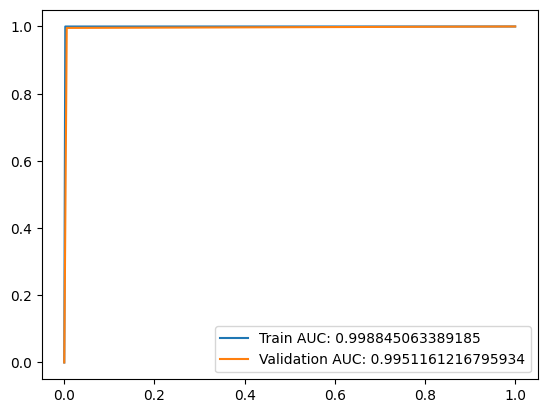

In [29]:
fpr_train, tpr_train, _ = roc_curve(train_true, train_pred)
auc_train = roc_auc_score(train_true, train_pred)
plt.plot(fpr_train, tpr_train, label=f"Train AUC: {auc_train}")

fpr_val, tpr_val, _ = roc_curve(val_true, val_pred)
auc_val = roc_auc_score(val_true, val_pred)
plt.plot(fpr_val, tpr_val, label=f"Validation AUC: {auc_val}")
plt.legend()
plt.show()

In [30]:
# Assuming test_dataset is your raw test data
tokenized_test = tokenize_texts(test_essays['text'])
test_seq = tokenized_test['input_ids']
test_mask = tokenized_test['attention_mask']

test_data = TensorDataset(test_seq, test_mask)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)

In [39]:
for batch in test_dataloader:
    batch = tuple(t.to('cuda') for t in batch)
    b_input_ids, b_input_mask = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs[0].float()
    logits = logits.detach().cpu()
    logits = torch.sigmoid(logits).numpy()

output = [r[np.argmax(r)] for r in logits]
print(output)

[0.90098536, 0.9403853, 0.96365756]


In [40]:
import pandas as pd

submission_df = pd.DataFrame({
    'id': test_essays['id'],
    'predicted_label': output
})

submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file saved to {submission_file_path}")

Submission file saved to submission.csv


In [42]:
daigt_ext = pd.read_csv('/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv')
daigt_ext

,id,text,instructions,source_text
0,6060D28C05B6,Some schools in United States ofter classes fr...,\nTask: Write a persuasive essay on whether or...,\nWhen considering the pros and cons of attend...
1,60623DB5DE7A,"Four-day work week, a remarkable idea to conse...",\nTask: Research the advantages and disadvanta...,\nOne of the primary arguments for implementin...
2,607A39D981DE,Students and their families should consider an...,\nTask: \n\n1. Talk to your parents before tak...,\nBefore making any decisions about getting in...
3,60ACDFA1609E,Agree you will never grow if something beyond ...,\nTask: Write an essay discussing the benefits...,"\nRalph Waldo Emerson once said, ""Go confident..."
4,60AE13D3F07B,I think our character traits are formed by inf...,\nTask: Research and discuss how character tra...,\nHuman character traits are shaped by a wide ...
...,...,...,...,...
2416,F5FF5E9E553C,"On september 2, 2015 Generic_Name was entering...",\nTask: Research different kinds of medical pr...,\nBecoming a surgeon requires a great deal of ...
2417,F60545D8271E,I think that schools must have a after school ...,\nTask: Write an essay discussing why schools ...,\nSchools should offer an after school homewor...
2418,F610B3CBF3DF,"Winston Churchill once said ""success consists ...",\nTask: Write an essay about how having a few ...,\nIt’s human nature to be afraid to make mista...
2419,F610C7BCD9EC,Technology seems to be becoming more and more ...,\nTask: \n\nWrite an essay exploring the pros ...,\nOne of the main debates of 2020 for many stu...


In [43]:
daigt_human = pd.DataFrame({'text': daigt_ext['text'], 'generated': 0})
daigt_ai = pd.DataFrame({'text': daigt_ext['source_text'], 'generated': 1})
daigt_data = pd.concat([daigt_human, daigt_ai], ignore_index=True)
daigt_data = daigt_data.drop_duplicates(subset=['text'])
daigt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       4842 non-null   object
 1   generated  4842 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.8+ KB


In [45]:
# Assuming test_dataset is your raw test data
tokenized_daigt = tokenize_texts(daigt_data['text'])
daigt_seq = tokenized_daigt['input_ids']
daigt_mask = tokenized_daigt['attention_mask']

daigt_dataset = TensorDataset(daigt_seq, daigt_mask, torch.tensor(daigt_data['generated']))
daigt_sampler = SequentialSampler(daigt_dataset)
daigt_dataloader = DataLoader(daigt_dataset, sampler=daigt_sampler, batch_size=32)

In [46]:
daigt_true, daigt_pred = evaluate_model(model, daigt_dataloader)

Accuracy: 0.9163568773234201


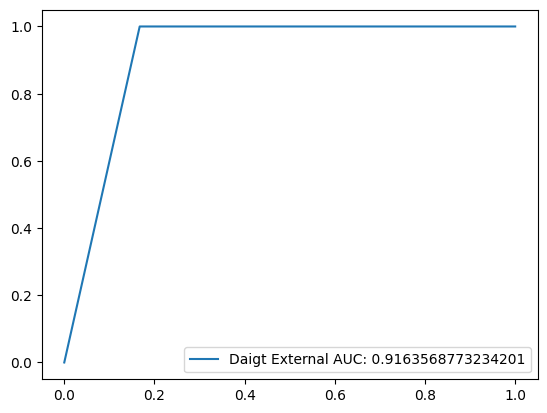

In [47]:
fpr_daigt, tpr_daigt, _ = roc_curve(daigt_true, daigt_pred)
auc_daigt = roc_auc_score(daigt_true, daigt_pred)
plt.plot(fpr_daigt, tpr_daigt, label=f"Daigt External AUC: {auc_daigt}")
plt.legend()
plt.show()